In [1]:
#import pkg_resources
#pkg_resources.working_set.by_key['pytesseract'].version

'0.3.4'

In [2]:
#Import the required libraries
import os
import cv2
import numpy as np
import pandas as pd
import pytesseract
import PIL 
from PIL import Image

#Natural Language Processing libraries
from spacy.matcher import PhraseMatcher
import nltk
import re as re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Importing tesseract from the location
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe" 

Trying with threshold 0


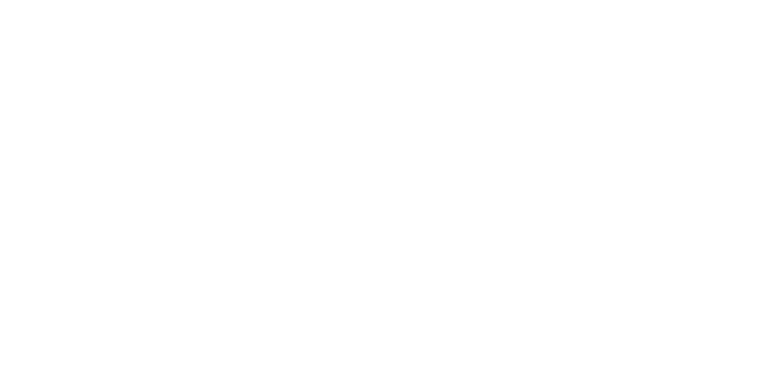


Trying with threshold 64


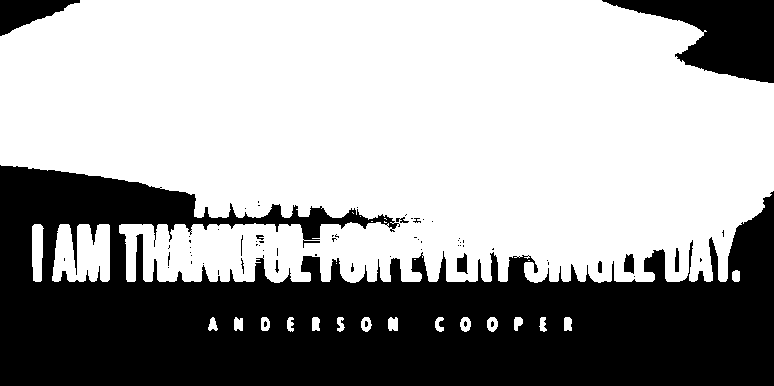

AWDERSOM COOPER
Trying with threshold 128


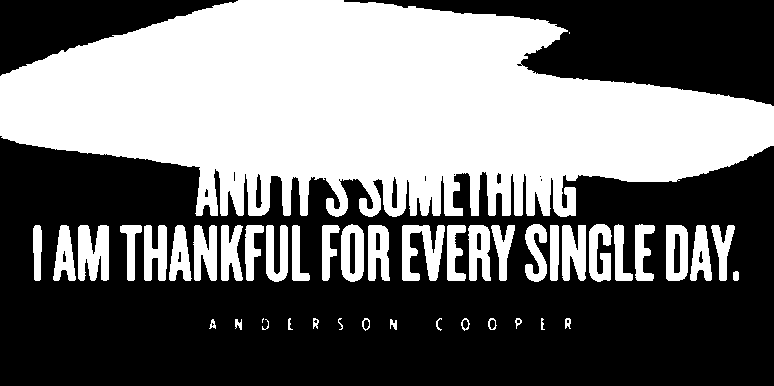

a

nh THANKFUL TAAL Hea

ANDERSON COOPER
Trying with threshold 192


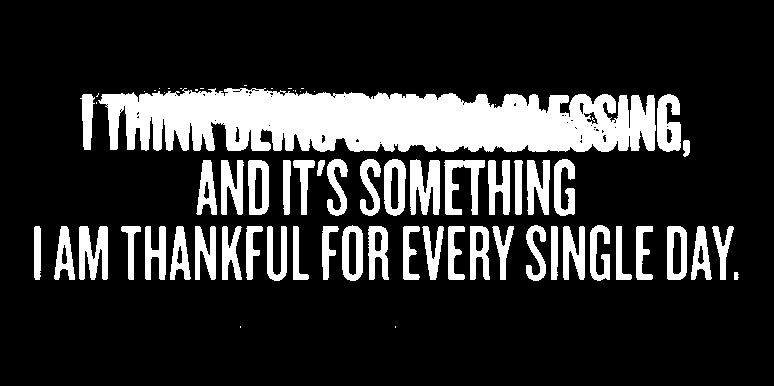

Ph tte gear ish
CUA ab
TAY
Trying with threshold 256


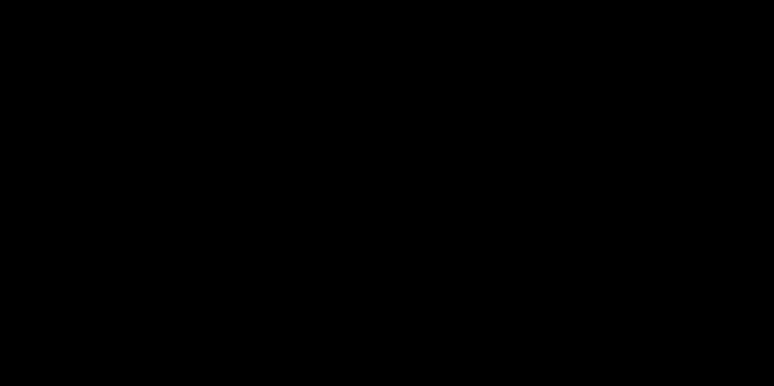

In [6]:
# So, that was a bit magical, and really required a fine reading of the docs to figure out
# that the number "1" is a string parameter to the convert function actually does the binarization.
# But you actually have all of the skills you need to write this functionality yourself.
# Lets walk through an example. First, lets define a function called binarize, which takes in
# an image and a threshold value:
def binarize(image_to_transform, threshold):
    # now, lets convert that image to a single greyscale image using convert()
    output_image=image_to_transform.convert("L")
    # the threshold value is usually provided as a number between 0 and 255, which
    # is the number of bits in a byte.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    for x in range(output_image.width):
        for y in range(output_image.height):
            # for the given pixel at w,h, lets check its value against the threshold
            if output_image.getpixel((x,y))< threshold: #note that the first parameter is actually a tuple object
                # lets set this to zero
                output_image.putpixel( (x,y), 0 )
            else:
                # otherwise lets set this to 255
                output_image.putpixel( (x,y), 255 )
    #now we just return the new image
    return output_image

# lets test this function over a range of different thresholds. Remember that you can use
# the range() function to generate a list of numbers at different step sizes. range() is called
# with a start, a stop, and a step size. So lets try range(0, 257, 64), which should generate 5
# images of different threshold values
for thresh in range(0,257,64):
    print("Trying with threshold " + str(thresh))
    # Lets display the binarized image inline
    display(binarize(Image.open('./Dataset/Test957.jpg'), thresh))
    # And lets use tesseract on it. It's inefficient to binarize it twice but this is just for
    # a demo
    print(pytesseract.image_to_string(binarize(Image.open('./Dataset/Test957.jpg'), thresh)))